In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image

In [31]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [32]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Thesis_testing/Test001', target_size=(200,200), batch_size=10, class_mode='binary')
val_dataset = validation.flow_from_directory('/content/drive/MyDrive/Thesis_testing/Test002', target_size=(200,200), batch_size=10, class_mode='binary')

Found 746 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [33]:
train_dataset.class_indices

{'CT_COVID': 0, 'CT_NonCOVID': 1}

In [34]:
val_dataset.classes

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [43]:
model = tf.keras.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation="relu",input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation  = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])

In [63]:
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=0.001),metrics =['accuracy'])

In [67]:
model_fit = model.fit(train_dataset, steps_per_epoch = 10, epochs = 100, validation_data= val_dataset)

Epoch 1/100
10/10 [==============================] - 4s 426ms/step - loss: 0.4126 - accuracy: 0.8400 - val_loss: 0.2187 - val_accuracy: 0.9000
Epoch 2/100
10/10 [==============================] - 4s 444ms/step - loss: 0.2372 - accuracy: 0.9300 - val_loss: 0.1126 - val_accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 4s 438ms/step - loss: 0.2930 - accuracy: 0.9062 - val_loss: 0.2150 - val_accuracy: 0.9000
Epoch 4/100
10/10 [==============================] - 4s 414ms/step - loss: 0.2277 - accuracy: 0.8854 - val_loss: 0.2059 - val_accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 4s 416ms/step - loss: 0.3267 - accuracy: 0.9000 - val_loss: 0.2377 - val_accuracy: 0.9000
Epoch 6/100
10/10 [==============================] - 4s 414ms/step - loss: 0.1853 - accuracy: 0.9500 - val_loss: 0.3239 - val_accuracy: 0.9000
Epoch 7/100
10/10 [==============================] - 4s 413ms/step - loss: 0.3025 - accuracy: 0.8700 - val_loss: 0.1301 - val_accuracy: 1.0000

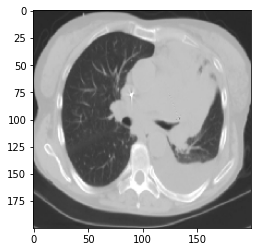

Not Covid 



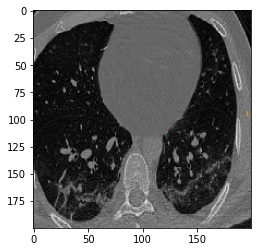

Covid



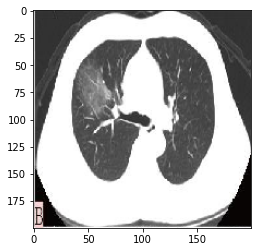

Covid



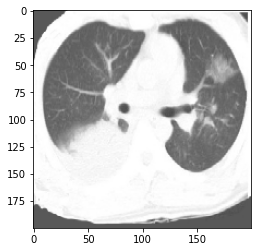

Not Covid 



In [78]:
dir_path = '/content/drive/MyDrive/Thesis_testing/Test003'

for i in os.listdir(dir_path):
  img = tf.keras.utils.load_img(dir_path+'/'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("Covid\n")
  else:
    print("Not Covid \n")